## Assignment: $k$ Means Clustering

### `! git clone https://www.github.com/ds4e/clustering`

### **Completed Questions: Q1 and Q5.**

**Q1.** This is a question about clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$. (Pay attention to the vertical axis across plots, or put all the scree curves on a single canvas.)
4. Explain the intuition of the elbow, using this numerical simulation as an example.

In [8]:
# part 1:

import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

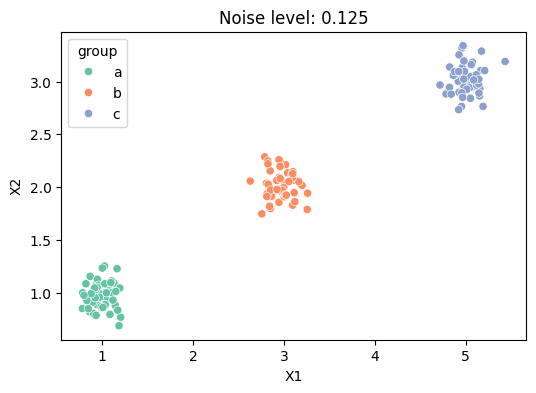

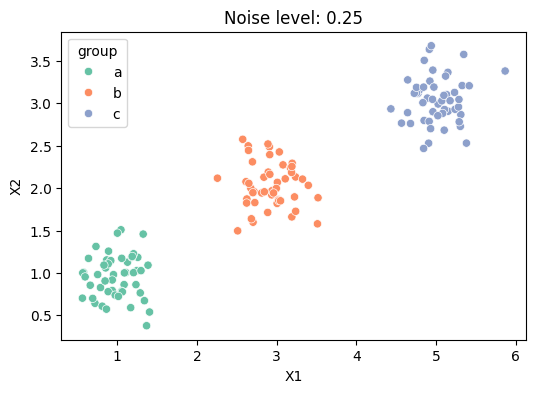

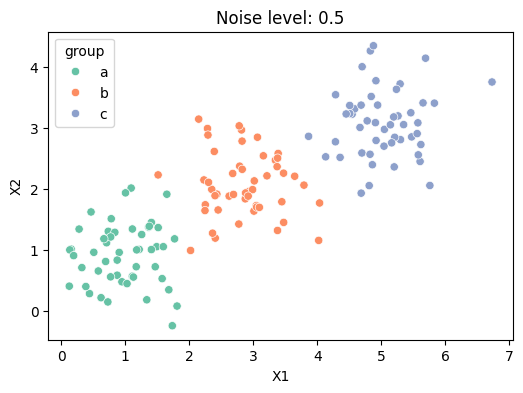

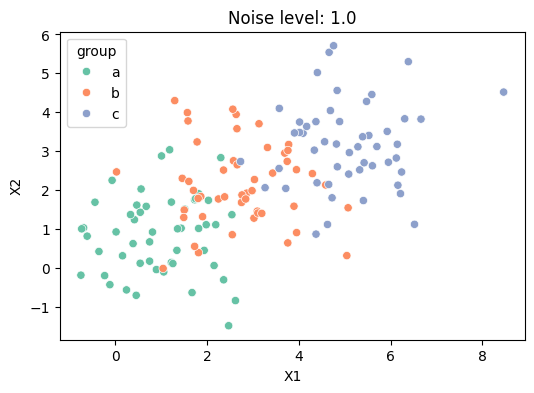

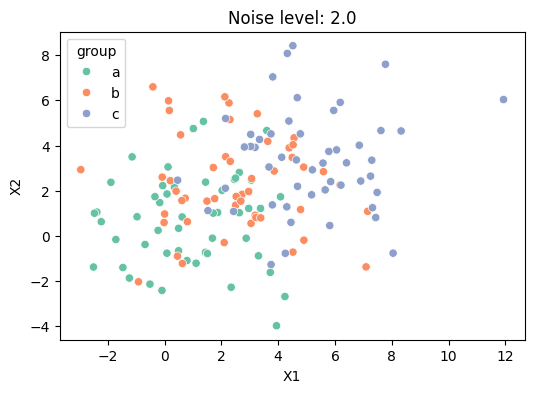

In [9]:
# part 2:

import matplotlib.pyplot as plt
import seaborn as sns

def plot_clusters(df, title):
    plt.figure(figsize=(6, 4)) # so i don't have to scroll for a long time to see all five graphs
    sns.scatterplot(data=df, x='x1', y='x2', hue='group', palette='Set2')
    plt.title(title)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()
    print("\n")

plot_clusters(df0_125, 'Noise level: 0.125')
plot_clusters(df0_25, 'Noise level: 0.25')
plot_clusters(df0_5, 'Noise level: 0.5')
plot_clusters(df1_0, 'Noise level: 1.0')
plot_clusters(df2_0, 'Noise level: 2.0')

We can see that as the noise level goes up, the clusters are less separated. At a noise level of 0.125 and 0.25 (and even 0.5), the clusters are distinctly apart. However, as the noise level gets larger, the clusters start overlapping with each other. At the high noise level of 2.0, the clusters seem to just completely overlap together and it is near impossible to visually distinguish among the groups if the data wasn't plotted with different colors for each cluster.

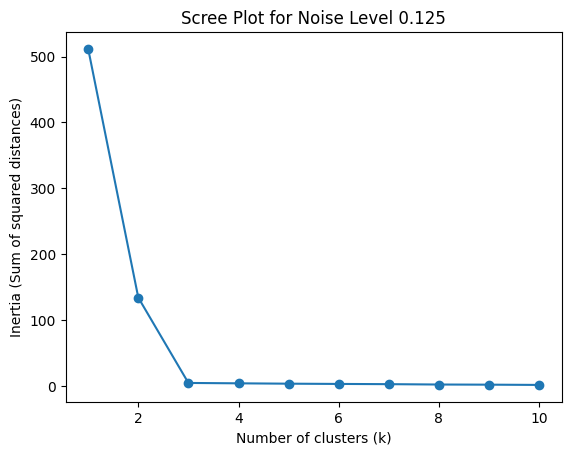

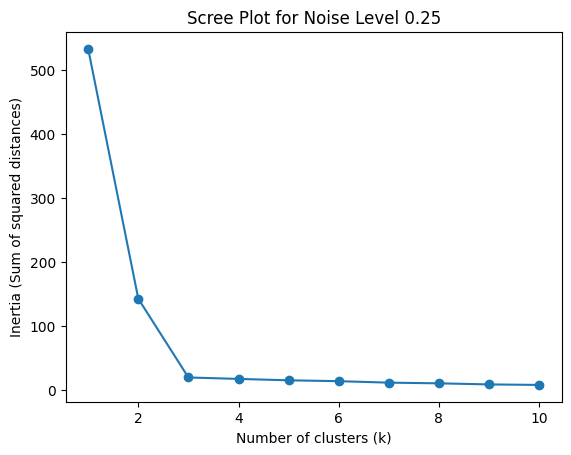

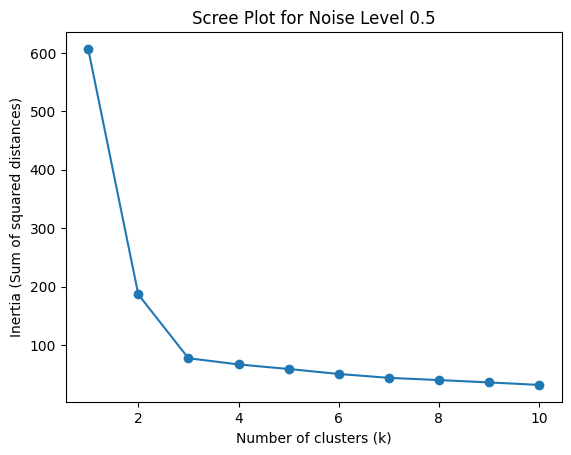

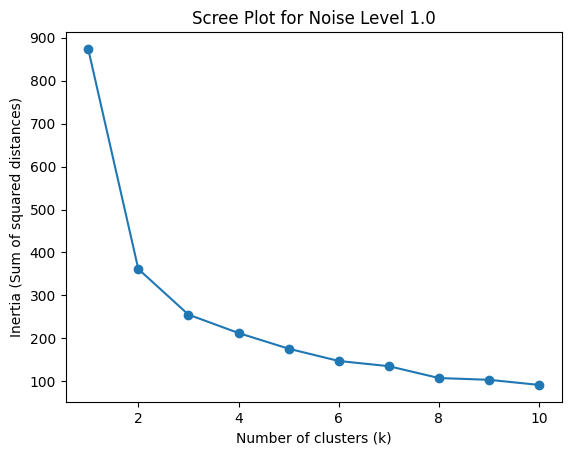

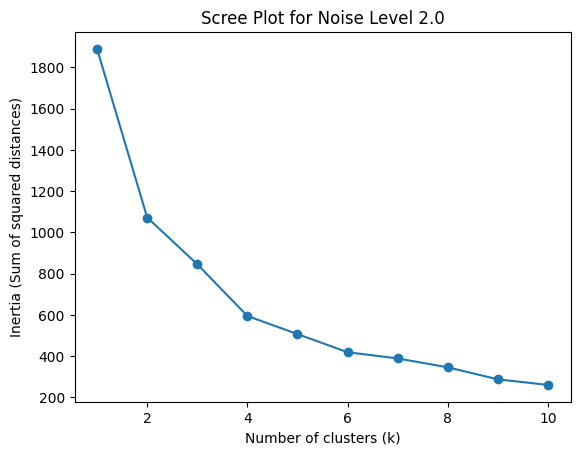

In [10]:
# part 3:

from sklearn.cluster import KMeans

def scree_plot(df, noise_level):
    X = df[['x1', 'x2']].values
    inertia = []
    for k in range(1, 11):  # trying k from 1 to 10
        kmeans = KMeans(n_clusters=k, random_state=100).fit(X)
        inertia.append(kmeans.inertia_)

    plt.plot(range(1, 11), inertia, marker='o', label=f'Noise {noise_level}')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Inertia (Sum of squared distances)')
    plt.title(f'Scree Plot for Noise Level {noise_level}')
    plt.show()
    print("\n")

scree_plot(df0_125, '0.125')
scree_plot(df0_25, '0.25')
scree_plot(df0_5, '0.5')
scree_plot(df1_0, '1.0')
scree_plot(df2_0, '2.0')

As noise increases, the elbow becomes less distinct, and so it becomes harder to pinpoint one ideal k value. As mentioned above, this is because the points are spread out and overlap more as noise increases, so the clusters are not separated as much (also, as noise increases, inertia at each k increases as well, which makes sense the noise makes the data points have more within-cluster variance and thus the sum of squared distances increases).


**Part 4:**

The elbow helps us visualize the point where increasing k doesn't help reduce the inertia by much anymore. This means that adding more clusters (increasing k) doesn't lead to a significant enough improvement in separating the data to justify it. As noise increases, the clusters overlap more and are hard to see distinctly, which is why the elbow might not be as prominent.

**Q5.** We looked at computer vision with $k$NN in a previous question. Can $k$ means clustering correctly group digits, even if we don't know which symbols are which?

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use $k$ means clustering on the reshaped `X_test` data with `k=10`.  
5. Cross tabulate the cluster assignments with the true labels for the test set values. How good is the correspondence? What proportion of digits are clustered correctly? Which digits are the hardest to distinguish from one another? Can $k$MC recover the latent digits 0 to 9, without even knowing what those digits were?
6. If you use a scree plot to determine the number of clusters $k$, does it pick 10 (the true number of digits), or not? If it fails to pick $k=10$, which digits does it tend to combine into the same classification?

In [11]:
# part 1:

from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


7 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  84 185 159 151  60  36   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 222 254 254 254 254 241 198 198 198 198 198 198 19

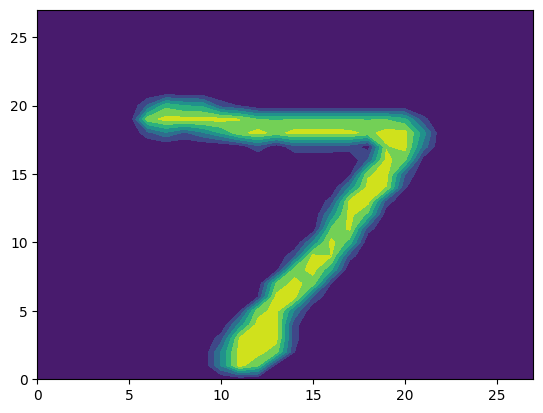

2 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 116 125 171 255 255 150  93   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 169 253 253 253 253 253 253 218  30   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 169 253 253 253 213 142 176 253 253 122   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  52 250 253 210  32  12   0   6 206 253 140   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  77 251 210  25   0   0   0 122 248 253  65   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  31  18   0   0   0   0 209 253 253  65   

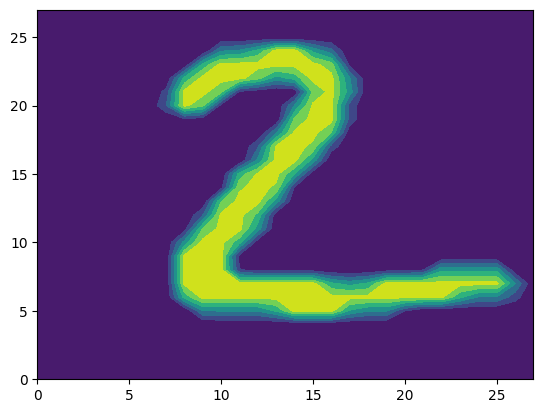

1 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  38 254 109   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  87 252  82   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 135 241   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  45 244 150   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  84 254  63   

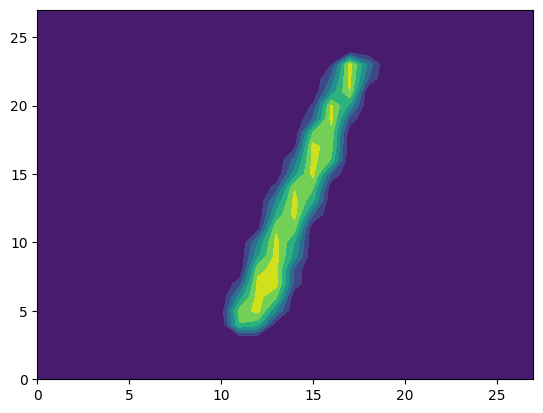

0 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  11 150 253 202  31   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  37 251 251 253 107   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  21 197 251 251 253 107   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 110 190 251 251 251 253 169 109  62   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 253 251 251 251 251 253 251 251 22

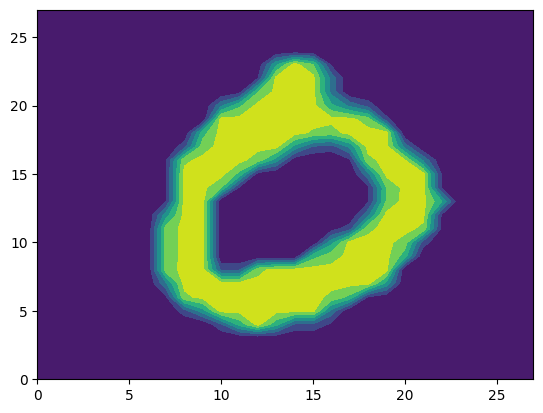

4 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  50 224   0   0   0   0   0   0   0  70  29   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 121 231   0   0   0   0   0   0   0 148 168   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   4 195 231   0   0   0   0   0   0   0  96 210  11   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  69 252 134   0   0   0   0   0   0   

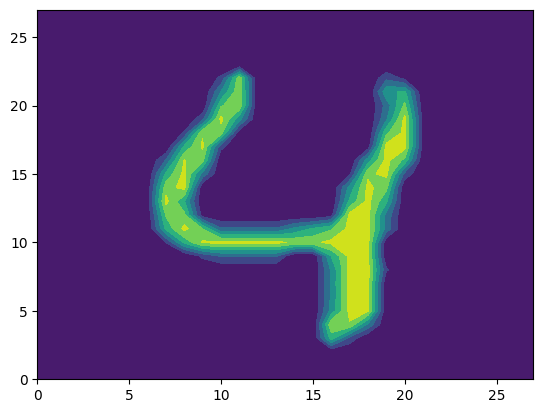

In [12]:
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
 print(y_test[i],'\n') # Print the label
 print(X_test[i],'\n') # Print the matrix of values
 plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
 plt.show()

In [15]:
# part 2:

print(X_train.shape)  # (60000, 28, 28) -> 60000 images, each being 28x28 pixels
print(X_test.shape)   # (10000, 28, 28) -> 10000 images, each being 28x28 pixels
print(y_train.shape)  # (60000,) -> 60,000 labels, one for each of the images in X_train
print(y_test.shape)   # (10000,) -> 10,000 labels, one for each of the images in X_test

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [16]:
# part 3:

X_train_reshaped = X_train.reshape((X_train.shape[0], 784))
# flattening the 28x28 pixel images into vectors of length 784

X_test_reshaped = X_test.reshape((X_test.shape[0], 784))
# flattening the test set into vectors of length 784

In [21]:
# part 4:

kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(X_train_reshaped)

KMeans(n_clusters=10, random_state=42)

In [22]:
# part 5:

y_pred = kmeans.predict(X_test_reshaped)

# cross-tabulating the true labels and predicted clusters
ct = pd.crosstab(y_test, y_pred, rownames=['True Label'], colnames=['Predicted Cluster'])
print(ct)

Predicted Cluster    0    1    2    3    4    5    6    7    8    9
True Label                                                         
0                   14    0    2   57    2  781    5   74   41    4
1                    0  660    0    3    0    0  469    1    2    0
2                   34   50   11   76    9   13   86   24   20  709
3                    7   58    8  685   18    4    5  178    9   38
4                  366   18  249    0  297    0   24    2   23    3
5                   28   20   57  297   50    6   91  316   23    4
6                  125   24    0    1    2   16   19   26  737    8
7                   76   36  425    0  429    1   48    1    1   11
8                   18   33   34  250   44    7   47  525   10    6
9                  225   16  241    7  489    7    7   13    2    2


The number of digits that are clustered properly is represented by the diagonal from 0,0 to 9,9. It actually doesn't seem like a majority (\<50\%), so the accuracy is very low (maybe I did something wrong?).

kMC can definitely help recover the latent digits, but there's a chance it could be inaccurate sometimes because certain digits have similar shapes (like 7 and 1) and can be mistakingly grouped into the same cluster because they share similar pixel distributions. kMC might have difficulties separate these digits accurately just by looking at the pixel patterns.

1
2
3
4
5
6
7
8
9
10


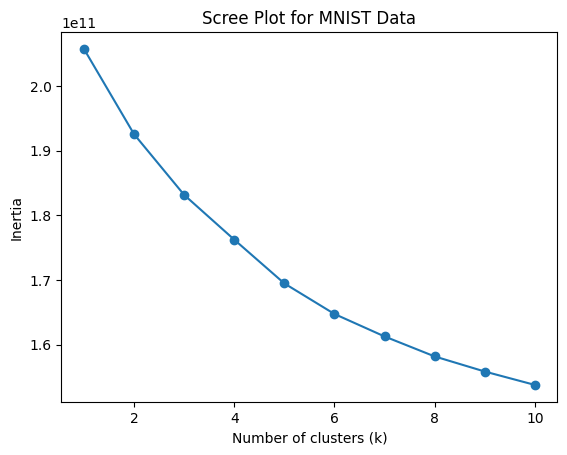

In [20]:
# part 6:

scree_plot_mnist = []
for k in range(1, 11):  # trying k from 1 to 10
    print(k) # to see where the code run is at
    kmeans = KMeans(n_clusters=k, random_state=100).fit(X_train_reshaped)
    scree_plot_mnist.append(kmeans.inertia_)

plt.plot(range(1, 11), scree_plot_mnist, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Scree Plot for MNIST Data')
plt.show()

There is not a clear elbow at all, but I think my best guess would be k=5 or 6, which is not k=10 and means there is a decent amount of mistakes made to combine different numbers into the same group. For example, 1 and 7, 3 and 8, and 2 and 9 are pairs of similarly shaped numbers that can be easily mixed up and grouped inaccurately.